# Ejercicio A

---

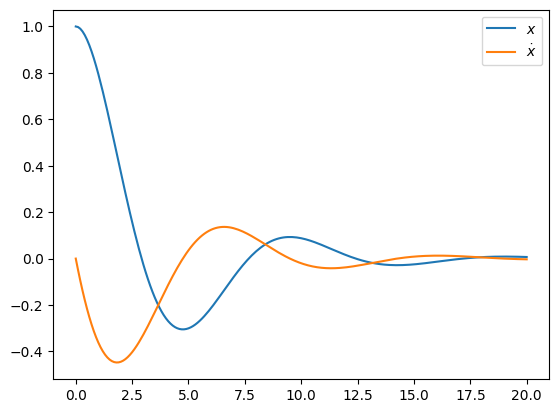

In [1]:
# Importamos liberias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definimos la funcion
def mydiff(x,t,k,m,b):
  dx1dt = x[1]
  dx2dt = -(b/m*x[1]) - (k/m*x[0]) 
  dxdt = [dx1dt,dx2dt]
  return dxdt

# Definimos el incio, fin de la simulacion y el incremento para la simulacion
tstart = 0
tstop = 20
increment = .1

# Definimos las constantes
k = 5 # constante del resorte (N/m)
m = 10 # masa (kg)
b = 5
# Creamos un arreglo con las constantes
t = np.arange(tstart, tstop+increment, increment)
x_init = [1,0]
x = odeint(mydiff,x_init,t,args=(k,m,b,))

# Definimos las variables
x1 = x[:,0]
x2 = x[:,1]

# Graficamos
plt.plot(t,x1,label=r'$x$')
plt.plot(t,x2,label=r'$\dot{x}$')
plt.legend()
plt.show()

In [5]:
from vedo import *
import time
from ipyvtk_simple.viewer import ViewInteractiveWidget
from pytictoc import TicToc
tstop = 7
video = Video ("Masa Resorte Amortiguador.mp4", duration=tstop, backend='opencv')
t_count = TicToc()
settings.allow_interaction=False
settings.default_backend = 'qt'
global vp, valx,val2
vp = Plotter (axes=4, interactive=False)
textv = "Masa Doble Resorte Amortiguador\n Ing. Ricardo Gomez"
world = Box([0,0,0], 4.5, 4.5, 4.5).wireframe()
BaseSistema = Box([0,2.2,0], 2.6, 0.1, 2.6)
Masa = Box([0,0,0], 2.0, 0.3, 2.0,c='red')
Resorte1 = Spring([-0.6,2.2,0],[-0.6,0,0],coils=25,c="gray")
valx = Text3D('x1 = '+str(np.round(x1[0], 2))+'m',s=0.15,c="darkblue", alpha =0.9, italic = True, depth=.01).pos(-0.6,0.05-1.2,0.03)
val2 =Text3D('t = '+str(np.round(0/t.shape[0], 2))+'s',s=0.15,c="darkblue", alpha =0.9, italic = True, depth=.01).pos(-0.6,0.3-1.2,0.03)
vp+=BaseSistema 
vp+=Masa
vp+=Resorte1
vp+=valx

vp.show().interactive()
ns = len(t)
pb = ProgressBar(0, ns, 1, c="b")
for tt in pb.range():
    t_count.tic()
    ttt = int(tt) 
    movX = x1[ttt]
    movY = x2[ttt] 
    vp.remove(valx)
    vp.remove(val2)
    valx =Text3D('x1 = '+str(np.round(movX, 2))+'m',s=0.15,c="darkblue", alpha =0.9, italic = True, depth=0.01).pos(-0.6,0.05-1.2,0.03)
    val2 =Text3D('t = '+str(np.round(t[ttt], 2))+'s',s=0.15,c="darkblue", alpha =0.9, italic = True, depth=0.01).pos(-0.6,0.3-1.2,0.03)
    vp+=valx
    vp+=val2
    Masa.SetPosition([0.0,movX+0,0.0])
    Resorte1.stretch([-0.6,2.2,0], [-0.6,0+movX, 0])
    pb.print() 
    vp.show()
    video.add_frame()
    vv=t_count.tocvalue()
    if vv<0.01:
        time.sleep(0.01-vv)
video.close()
vp.interactive().close()

 ━━━━━━━━━━━━━━━━━━━━━━ elapsed: 4s (19.2 it/s)            ───────────────── 1% 
recalculated fps: 10

# Ejercicio B

---

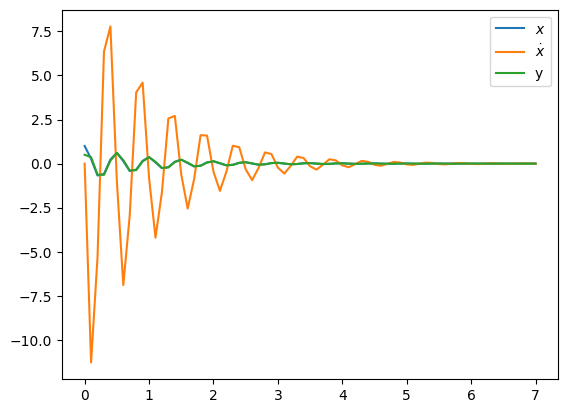

In [3]:
# Importamos liberias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definimos la funcion
def mydiff(x,t,k1,k2,m,b):
  dx1dt = x[1]
  dx2dt = -(k1/m)*(x[0]-x[2])-(k2/m)*x[0]
  dx3dt = (k1/b)*(x[0]-x[2])
  dxdt = [dx1dt,dx2dt,dx3dt]
  return dxdt

# Definimos el incio, fin de la simulacion y el incremento para la simulacion
tstart = 0
tstop = 7
increment = .1

# Definimos las constantes
k1 = 50 # constante del resorte (N/m)
k2 = 31.75 # constante del resorte (N/m)
m = .2 # masa (kg)
b = .4
# Creamos un arreglo con las constantes
t = np.arange(tstart, tstop+increment, increment)
x_init = [1,0,0.5]
x = odeint(mydiff,x_init,t,args=(k1,k2,m,b,))

# Definimos las variables
x1 = x[:,0]
x2 = x[:,1]
x3 = x[:,2]
# Graficamos
plt.plot(t,x1,label=r'$x$')
plt.plot(t,x2,label=r'$\dot{x}$')
plt.plot(t,x3,label=r'y')
plt.legend()
plt.show()

In [4]:
from vedo import *
import time
from ipyvtk_simple.viewer import ViewInteractiveWidget
from pytictoc import TicToc
tstop = 7
video = Video ("Masa Resorte 2Amortiguador.mp4", duration=tstop, backend='opencv')
t_count = TicToc()
settings.allow_interaction=False
settings.default_backend = 'qt'
global vp, valx,valy, val2
vp = Plotter (axes=4, interactive=False)
textv = "Masa Doble Resorte Amortiguador\n Ing. Ricardo Gomez"
world = Box([0,0,0], 4.5, 4.5, 4.5).wireframe()
BaseSistema = Box([0,2.2,0], 2.6, 0.1, 2.6)
Masa = Box([0,0,0], 2.0, 0.3, 2.0,c='red')
Amortiguador = Cylinder(pos=[0.6, 0.0, -1.3], r=0.2, height=0.8, c='blue').rotate_x(90)
AmortiguadorPiston = Cylinder(pos=[0.6, 0.0, -1.8], r=0.1, height=1.2, c='yellow').rotate_x(90)
Resorte1 = Spring([-0.6,2.2,0],[-0.6,0,0],coils=25,c="gray")
Resorte2 = Spring([0.6,1.3,0],[0.6,0,0],coils=15,c="gray")
valx = Text3D('x1 = '+str(np.round(x1[0], 2))+'m',s=0.15,c="darkblue", alpha =0.9, italic = True, depth=.01).pos(-0.6,0.05-1.2,0.03)
valy =Text3D('x2 = '+str(np.round(x3[0], 2))+'m',s=0.15,c="darkblue", alpha =0.9, italic = True, depth=.01).pos(-0.6,-0.2-1.2,0.03)
val2 =Text3D('t = '+str(np.round(0/t.shape[0], 2))+'s',s=0.15,c="darkblue", alpha =0.9, italic = True, depth=.01).pos(-0.6,0.3-1.2,0.03)
vp+=BaseSistema 
vp+=Masa
vp+=Amortiguador
vp+=AmortiguadorPiston
vp+=Resorte1
vp+=Resorte2 
vp+=valx

vp.show().interactive()
ns = len(t)
pb = ProgressBar(0, ns, 1, c="b")
for tt in pb.range():
    t_count.tic()
    ttt = int(tt) 
    movX = x1[ttt]
    movY = x3[ttt] 
    vp.remove(valx) 
    vp.remove(valy)
    vp.remove(val2)
    valx =Text3D('x1 = '+str(np.round(movX, 2))+'m',s=0.15,c="darkblue", alpha =0.9, italic = True, depth=0.01).pos(-0.6,0.05-1.2,0.03)
    valy =Text3D('x2 = '+str(np.round(movX, 2))+'m',s=0.15,c="darkblue", alpha =0.9, italic = True, depth=0.01).pos(-0.6,-.2-1.2,0.03)
    val2 =Text3D('t = '+str(np.round(t[ttt], 2))+'s',s=0.15,c="darkblue", alpha =0.9, italic = True, depth=0.01).pos(-0.6,0.3-1.2,0.03)
    vp+=valx
    vp+=valy
    vp+=val2
    Masa.SetPosition([0.0,movX+0,0.0])
    Resorte1.stretch([-0.6,2.2,0], [-0.6,0+movX, 0]) 
    Resorte2.stretch([0.6, 1.3+movY,0], [0.6,+movX,0])
    Amortiguador.SetPosition([0.6, 1.3+movY, 0.0])
    pb.print() 
    vp.show()
    video.add_frame()
    vv=t_count.tocvalue()
    if vv<0.01:
        time.sleep(0.01-vv)
video.close()
vp.interactive().close()

 ━━━━━━━━━━━━━━━━━━━━━━ elapsed: 4s (19.1 it/s)            ────────────────── 1% 
recalculated fps: 10